## MODELING DETERMINANTS OF ANTENATAL VISITS IN KENYA USING POISSON AND NEGATIVE BINOMIAL REGRESSION
Group members

-Faustina Atoti

-Angel linah Atungire

-Mbeki Donnethian

-Kevin Karanja

-Alvin Mutethia

In [2]:
#import libraries to be used 
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats 
import statsmodels.formula.api as smf
from patsy import dmatrices

In [2]:
# Load the dataset
input_file = "KENR8CFL.SAS7BDAT"  # Change this to your actual file name
df, meta = pyreadstat.read_sas7bdat(input_file)

In [3]:
df.head()

,CASEID,PIDX,V000,V001,V002,V003,V004,V005,V006,V007,...,SDV30BN,SDV30BX,SDV30BZ,SDV35A,SREDUC,SPEDUC,IDX94,IDX94P,S446,S454A
0,1 4 2,1.0,KE8,1.0,4.0,2.0,1.0,1296049.0,4.0,2022.0,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,2.0,203.0
1,1 7 2,1.0,KE8,1.0,7.0,2.0,1.0,1296049.0,4.0,2022.0,...,NaN,NaN,NaN,NaN,2.0,3.0,0.0,1.0,NaN,NaN
2,1 55 2,1.0,KE8,1.0,55.0,2.0,1.0,1296049.0,4.0,2022.0,...,NaN,NaN,NaN,0.0,2.0,4.0,1.0,1.0,NaN,206.0
3,1 55 2,2.0,KE8,1.0,55.0,2.0,1.0,1296049.0,4.0,2022.0,...,NaN,NaN,NaN,0.0,2.0,4.0,2.0,2.0,NaN,NaN
4,1 65 2,1.0,KE8,1.0,65.0,2.0,1.0,1296049.0,4.0,2022.0,...,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.0,1.0,307.0


In [4]:
with open("KENR8CFL.MAP", "r") as file2:
    content1 = file2.read()
    print(content1)  # Prints the contents of the file

                                                   KENR8CFL                                                   
                                                KENR8CFL_DICT                                                 

                                             KENR8CFL.DCF                                                     
                                    Last Modified:  8/12/2024  1:03:00 PM                                     

--------------------------------------------------------------------------------------------------------------
Level Name                    Level Label                                                  Type            Rec
  Record Name                   Record Label                                              Value  Req  Max  Len
--------------------------------------------------------------------------------------------------------------
HOUSEHOLD                     HOUSEHOLD                                                                       

In [5]:
meta.column_labels

['Case Identification',
 'Pregnancy column number',
 'Country code and phase',
 'Cluster number',
 'Household number',
 "Respondent's line number",
 'Ultimate area unit',
 "Women's individual sample weight (6 decimals)",
 'Month of interview',
 'Year of interview',
 'Date of interview (CMC)',
 'Date of interview Century Day Code (CDC)',
 "Respondent's month of birth",
 "Respondent's year of birth",
 'Date of birth (CMC)',
 "Respondent's current age",
 'Age in 5-year groups',
 'Completeness of age information',
 'Result of individual interview',
 'Day of interview',
 'CMC start of calendar',
 'Row of month of interview',
 'Length of calendar',
 'Number of calendar columns',
 'Ever-married sample',
 'Primary sampling unit',
 'Sample strata for sampling errors',
 'Stratification used in sample design',
 'Region',
 'Type of place of residence',
 'NA - De facto place of residence',
 'Number of visits',
 'Interviewer identification',
 'NA - Keyer identification',
 'Field supervisor',
 'NA - 

In [6]:
meta.column_names

['CASEID',
 'PIDX',
 'V000',
 'V001',
 'V002',
 'V003',
 'V004',
 'V005',
 'V006',
 'V007',
 'V008',
 'V008A',
 'V009',
 'V010',
 'V011',
 'V012',
 'V013',
 'V014',
 'V015',
 'V016',
 'V017',
 'V018',
 'V019',
 'V019A',
 'V020',
 'V021',
 'V022',
 'V023',
 'V024',
 'V025',
 'V026',
 'V027',
 'V028',
 'V029',
 'V030',
 'V031',
 'V032',
 'V034',
 'V040',
 'V042',
 'V044',
 'V045A',
 'V045B',
 'V045C',
 'V046',
 'V047',
 'V048',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V105A',
 'V106',
 'V107',
 'V113',
 'V115',
 'V116',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V127',
 'V128',
 'V129',
 'V130',
 'V131',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V138',
 'V139',
 'V140',
 'V141',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'AWFACTT',
 'AWFACTU',
 'AWFACTR',
 'AWFACTE',
 'AWFACTW',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V166',
 'V167',
 'V168',
 'V169A',
 'V169B',
 'V169C',
 'V170',
 'V171A',
 'V171B',
 'V172',
 'V173',
 'V174M',

In [7]:
# Define the columns to keep (from Word documents)
selected_columns = [ "CASEID", "M14", "V013", "SREDUC", "V501", "V190", "V714", "V025", "V483A", "M15", "V155", "PORD", "V743A", "M2N", "V176"]

#selected_columns = ["Number of antenatal visits during pregnancy", 
#"Respondent's current age", "Respondent education",
# "current marital status", "Wealth index combined", "Respondent currently working", "Type of place of residence",
# "Minutes to healthcare", "Place of delivery", "Covered by health insurance",
#"Literacy", "Mode of transport to nearest healthcare"]

In [8]:
# Select only those columns (check if they exist in case of naming issues)
df_selected = df[selected_columns]

In [9]:
df_selected["CASEID"] = df_selected["CASEID"].astype("category")

C:\Users\Angel Linah\AppData\Local\Temp\ipykernel_12656\994183819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["CASEID"] = df_selected["CASEID"].astype("category")


In [10]:
df_selected.dtypes

CASEID    category
M14        float64
V013       float64
SREDUC     float64
V501       float64
V190       float64
V714       float64
V025       float64
V483A      float64
M15        float64
V155       float64
PORD       float64
V743A      float64
M2N        float64
V176       float64
dtype: object

In [11]:
df_selected.head()

,CASEID,M14,V013,SREDUC,V501,V190,V714,V025,V483A,M15,V155,PORD,V743A,M2N,V176
0,1 4 2,5.0,4.0,0.0,1.0,4.0,0.0,1.0,30.0,21.0,0.0,4.0,4.0,0.0,1.0
1,1 7 2,NaN,5.0,2.0,1.0,5.0,0.0,1.0,NaN,NaN,2.0,2.0,4.0,NaN,2.0
2,1 55 2,3.0,4.0,2.0,1.0,5.0,0.0,1.0,NaN,21.0,2.0,3.0,1.0,0.0,3.0
3,1 55 2,NaN,4.0,2.0,1.0,5.0,0.0,1.0,NaN,21.0,2.0,2.0,1.0,NaN,3.0
4,1 65 2,6.0,2.0,2.0,1.0,5.0,0.0,1.0,10.0,21.0,2.0,1.0,1.0,0.0,2.0


In [12]:
df_selected1 = df_selected.drop_duplicates(subset=["CASEID"], keep="first")

In [13]:
df_selected1.head()

,CASEID,M14,V013,SREDUC,V501,V190,V714,V025,V483A,M15,V155,PORD,V743A,M2N,V176
0,1 4 2,5.0,4.0,0.0,1.0,4.0,0.0,1.0,30.0,21.0,0.0,4.0,4.0,0.0,1.0
1,1 7 2,NaN,5.0,2.0,1.0,5.0,0.0,1.0,NaN,NaN,2.0,2.0,4.0,NaN,2.0
2,1 55 2,3.0,4.0,2.0,1.0,5.0,0.0,1.0,NaN,21.0,2.0,3.0,1.0,0.0,3.0
4,1 65 2,6.0,2.0,2.0,1.0,5.0,0.0,1.0,10.0,21.0,2.0,1.0,1.0,0.0,2.0
5,2 15 2,5.0,3.0,0.0,1.0,3.0,0.0,1.0,30.0,21.0,0.0,4.0,2.0,0.0,3.0


In [14]:
# Save the new dataset as a CSV file
output_file = "filtered_dataset.csv"
df_selected1.to_csv(output_file, index=False)

print(f"New dataset saved as {output_file}")

New dataset saved as filtered_dataset.csv


In [3]:
# Load the dataset
df = pd.read_csv("filtered_dataset.csv")

# Display the first few rows
df.head()

,CASEID,M14,V013,SREDUC,V501,V190,V714,V025,V483A,M15,V155,PORD,V743A,M2N,V176
0,1 4 2,5.0,4.0,0.0,1.0,4.0,0.0,1.0,30.0,21.0,0.0,4.0,4.0,0.0,1.0
1,1 7 2,NaN,5.0,2.0,1.0,5.0,0.0,1.0,NaN,NaN,2.0,2.0,4.0,NaN,2.0
2,1 55 2,3.0,4.0,2.0,1.0,5.0,0.0,1.0,NaN,21.0,2.0,3.0,1.0,0.0,3.0
3,1 65 2,6.0,2.0,2.0,1.0,5.0,0.0,1.0,10.0,21.0,2.0,1.0,1.0,0.0,2.0
4,2 15 2,5.0,3.0,0.0,1.0,3.0,0.0,1.0,30.0,21.0,0.0,4.0,2.0,0.0,3.0


In [4]:
df.info()  # Shows column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11195 entries, 0 to 11194
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CASEID  11195 non-null  object 
 1   M14     10391 non-null  float64
 2   V013    11195 non-null  float64
 3   SREDUC  11195 non-null  float64
 4   V501    11195 non-null  float64
 5   V190    11195 non-null  float64
 6   V714    11195 non-null  float64
 7   V025    11195 non-null  float64
 8   V483A   5889 non-null   float64
 9   M15     10391 non-null  float64
 10  V155    11195 non-null  float64
 11  PORD    11195 non-null  float64
 12  V743A   9056 non-null   float64
 13  M2N     10391 non-null  float64
 14  V176    11195 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.3+ MB


In [5]:
df.describe()  # Summary statistics for numerical columns

,M14,V013,SREDUC,V501,V190,V714,V025,V483A,M15,V155,PORD,V743A,M2N,V176
count,10391.000000,11195.000000,11195.000000,11195.000000,11195.000000,11195.000000,11195.000000,5889.000000,10391.000000,11195.000000,11195.000000,9056.000000,10391.000000,11195.000000
mean,4.164758,3.289147,1.502635,1.277892,2.736847,0.434837,1.643144,42.200374,22.255895,1.425368,3.364984,2.045384,0.036281,1.967575
std,3.552384,1.374200,1.129330,1.102666,1.458152,0.495758,0.479093,57.398084,9.094894,0.850143,2.346192,1.062297,0.186998,0.697582
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,11.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,15.000000,21.000000,1.000000,2.000000,1.000000,0.000000,2.000000
50%,4.000000,3.000000,1.000000,1.000000,3.000000,0.000000,2.000000,30.000000,21.000000,2.000000,3.000000,2.000000,0.000000,2.000000
75%,5.000000,4.000000,2.000000,1.000000,4.000000,1.000000,2.000000,60.000000,23.000000,2.000000,5.000000,2.000000,0.000000,2.000000
max,98.000000,7.000000,6.000000,5.000000,5.000000,1.000000,2.000000,600.000000,96.000000,4.000000,15.000000,6.000000,1.000000,5.000000


In [6]:
#Check if the dependent variable is a count variable
print(df['M14'].describe())  # Summary statistics

count    10391.000000
mean         4.164758
std          3.552384
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         98.000000
Name: M14, dtype: float64


In [7]:
print(df['M14'].dtypes)  # Check data types

float64


In [8]:
#remove "don't know" (98) and "missing" (99)
df["M14"] = df["M14"].replace({98: np.nan, 99: np.nan})

In [9]:
#Check if the dependent variable is a count variable
print(df['M14'].describe())  # Summary statistics

count    10380.000000
mean         4.065318
std          1.814123
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         20.000000
Name: M14, dtype: float64


In [10]:
df.info()  # Shows column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11195 entries, 0 to 11194
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CASEID  11195 non-null  object 
 1   M14     10380 non-null  float64
 2   V013    11195 non-null  float64
 3   SREDUC  11195 non-null  float64
 4   V501    11195 non-null  float64
 5   V190    11195 non-null  float64
 6   V714    11195 non-null  float64
 7   V025    11195 non-null  float64
 8   V483A   5889 non-null   float64
 9   M15     10391 non-null  float64
 10  V155    11195 non-null  float64
 11  PORD    11195 non-null  float64
 12  V743A   9056 non-null   float64
 13  M2N     10391 non-null  float64
 14  V176    11195 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.3+ MB


In [11]:
# Fill missing values with the mean
#df["M14"].fillna(df["M14"].mean(), inplace=True)

In [12]:
# Fill missing values with the minimum
df["M14"].fillna(df["M14"].min(), inplace=True)

In [23]:
# Fill missing values in M14 with the mode
#df["M14"].fillna(df["M14"].mode()[0], inplace=True)

In [22]:
# Fill missing values in M14 with the median
#df["M14"].fillna(df["M14"].median(), inplace=True)

In [22]:
# Fill missing values in M14 with the maximum value
#df["M14"].fillna(df["M14"].max(), inplace=True)

In [ ]:
# Fill missing values in M14 with the 75th percentile (Q3)
# df["M14"].fillna(df["M14"].quantile(0.75), inplace=True)

In [13]:
print(f"Minimum Value: {df['M14'].min()}") # Ensure no negative values

Minimum Value: 0.0


In [14]:
#Check for over dispersion
mean_m14 = df['M14'].mean()
var_m14 = df['M14'].var()
print(f"M14 - Mean: {mean_m14}, Variance: {var_m14}")

M14 - Mean: 3.7693613220187583, Variance: 4.167097635648615


In [15]:
df.info()  # Shows column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11195 entries, 0 to 11194
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CASEID  11195 non-null  object 
 1   M14     11195 non-null  float64
 2   V013    11195 non-null  float64
 3   SREDUC  11195 non-null  float64
 4   V501    11195 non-null  float64
 5   V190    11195 non-null  float64
 6   V714    11195 non-null  float64
 7   V025    11195 non-null  float64
 8   V483A   5889 non-null   float64
 9   M15     10391 non-null  float64
 10  V155    11195 non-null  float64
 11  PORD    11195 non-null  float64
 12  V743A   9056 non-null   float64
 13  M2N     10391 non-null  float64
 14  V176    11195 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.3+ MB


In [16]:
# Calculate the mean, ignoring NaN values
mean_value = df["V483A"].mean(skipna=True)

# Fill missing values with the mean
df["V483A"].fillna(mean_value, inplace=True)

# Verify if there are any remaining NaN values
print(df["V483A"].isnull().sum())  # Should print 0 if all missing values are filled

0


In [17]:
df.info()  # Shows column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11195 entries, 0 to 11194
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CASEID  11195 non-null  object 
 1   M14     11195 non-null  float64
 2   V013    11195 non-null  float64
 3   SREDUC  11195 non-null  float64
 4   V501    11195 non-null  float64
 5   V190    11195 non-null  float64
 6   V714    11195 non-null  float64
 7   V025    11195 non-null  float64
 8   V483A   11195 non-null  float64
 9   M15     10391 non-null  float64
 10  V155    11195 non-null  float64
 11  PORD    11195 non-null  float64
 12  V743A   9056 non-null   float64
 13  M2N     10391 non-null  float64
 14  V176    11195 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.3+ MB


In [18]:
# Calculate the mean, ignoring NaN values
mean_value = df["V743A"].mean(skipna=True)

# Fill missing values with the mean
df["V743A"].fillna(mean_value, inplace=True)

# Verify if there are any remaining NaN values
print(df["V743A"].isnull().sum())  # Should print 0 if all missing values are filled

0


In [19]:
df.info()  # Shows column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11195 entries, 0 to 11194
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CASEID  11195 non-null  object 
 1   M14     11195 non-null  float64
 2   V013    11195 non-null  float64
 3   SREDUC  11195 non-null  float64
 4   V501    11195 non-null  float64
 5   V190    11195 non-null  float64
 6   V714    11195 non-null  float64
 7   V025    11195 non-null  float64
 8   V483A   11195 non-null  float64
 9   M15     10391 non-null  float64
 10  V155    11195 non-null  float64
 11  PORD    11195 non-null  float64
 12  V743A   11195 non-null  float64
 13  M2N     10391 non-null  float64
 14  V176    11195 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.3+ MB


In [20]:
df.isnull().sum() # final check for missing values

CASEID      0
M14         0
V013        0
SREDUC      0
V501        0
V190        0
V714        0
V025        0
V483A       0
M15       804
V155        0
PORD        0
V743A       0
M2N       804
V176        0
dtype: int64

In [21]:
# Define the mapping of old values to new values
literacy_mapping = {
    4: 0,  # Blind/visually impaired -> 0
    0: 1,  # Cannot read at all -> 1
    1: 2,  # Able to read only parts of a sentence -> 2
    3: 3,  # No card with required language -> 3
    2: 4   # Able to read whole sentence -> 4
}

# Replace values in the 'V155' column
df["V155"] = df["V155"].replace(literacy_mapping)

# Verify the changes
df["V155"].value_counts()

4.0    7415
1.0    2666
2.0    1109
0.0       3
3.0       2
Name: V155, dtype: int64

In [22]:
# Define the mapping of old values to new autonomy rankings
autonomy_mapping = {
    5: 1,  # Someone else → 1
    6: 2,  # Other → 2
    4: 3,  # Husband/partner alone → 3
    3: 4,  # Respondent and other person → 4
    2: 5,  # Respondent and husband/partner → 5
    1: 6   # Respondent alone → 6
}

# Replace values in the V743A column
df["V743A"] = df["V743A"].replace(autonomy_mapping)

# Verify the changes
df["V743A"].value_counts()

5.000000    4215
6.000000    3101
2.045384    2139
3.000000    1716
1.000000      16
2.000000       8
Name: V743A, dtype: int64

In [23]:
# Define the mapping to interchange values
care_mapping = {0: 1, 1: 0}

# Replace values in the M2N column
df["M2N"] = df["M2N"].replace(care_mapping)

# Verify the changes
df["M2N"].value_counts()

1.0    10014
0.0      377
Name: M2N, dtype: int64

In [24]:
# Define the mapping for reordering education levels
education_mapping = {
    0: 0,  # No education
    6: 1,  # Informal education (madrasa/adult basic)
    1: 2,  # Primary
    5: 3,  # Vocational
    2: 4,  # Secondary/"A" level
    3: 5,  # Middle level college (certificate/diploma)
    4: 6   # University
}

# Apply the mapping to the SREDUC column
df["SREDUC"] = df["SREDUC"].replace(education_mapping)

# Verify the changes
df["SREDUC"].value_counts()

2.0    3783
4.0    3390
0.0    2190
5.0    1235
6.0     456
3.0     116
1.0      25
Name: SREDUC, dtype: int64

In [25]:
# Define the mapping for reordering marital status
marital_status_mapping = {
    0: 0,  # Never in union
    3: 1,  # Widowed
    4: 2,  # Divorced
    5: 3,  # No longer living together/separated
    2: 4,  # Living with partner
    1: 5   # Married
}

# Apply the mapping to the V501 column
df["V501"] = df["V501"].replace(marital_status_mapping)

# Verify the changes
df["V501"].value_counts()

5.0    8174
0.0    1165
4.0     882
3.0     651
1.0     179
2.0     144
Name: V501, dtype: int64

In [26]:
# Define the updated mapping for M15 grouping
m15_mapping = {
    11: 1, 12: 1,  # Home
    21: 2, 22: 2, 23: 2, 26: 2,  # Government
    31: 3, 32: 3, 36: 3, 96: 3,  # NGO/Mission/Others
    41: 5, 42: 5, 43: 5, 44: 5, 45: 5, 46: 5  # Private
}

# Apply the mapping to the M15 column
df["M15"] = df["M15"].replace(m15_mapping)

# Verify the changes
df["M15"].value_counts()

2.0    6639
1.0    1890
3.0    1330
5.0     532
Name: M15, dtype: int64

In [27]:
df.describe()  # Summary statistics for numerical columns

,M14,V013,SREDUC,V501,V190,V714,V025,V483A,M15,V155,PORD,V743A,M2N,V176
count,11195.000000,11195.000000,11195.000000,11195.000000,11195.000000,11195.000000,11195.000000,11195.000000,10391.000000,11195.000000,11195.000000,11195.000000,10391.000000,11195.000000
mean,3.769361,3.289147,2.716391,4.182046,2.736847,0.434837,1.643144,42.200374,2.099702,3.086199,3.364984,4.398042,0.963719,1.967575
std,2.041347,1.374200,1.771434,1.617336,1.458152,0.495758,0.479093,41.628297,0.872238,1.307331,2.346192,1.491726,0.186998,0.697582
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,3.000000,2.000000,2.000000,4.000000,1.000000,0.000000,1.000000,30.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000
50%,4.000000,3.000000,2.000000,5.000000,3.000000,0.000000,2.000000,42.200374,2.000000,4.000000,3.000000,5.000000,1.000000,2.000000
75%,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,2.000000,42.200374,2.000000,4.000000,5.000000,6.000000,1.000000,2.000000
max,20.000000,7.000000,6.000000,5.000000,5.000000,1.000000,2.000000,600.000000,5.000000,4.000000,15.000000,6.000000,1.000000,5.000000


In [28]:
#check for zero inflation
zero_count = (df['M14'] == 0).sum()
total_count = len(df)
print(f"M14 - Zero Counts: {zero_count}, Percentage: {zero_count / total_count:.2%}")

M14 - Zero Counts: 1192, Percentage: 10.65%


In [29]:
df.isnull().sum() # final check for missing values

CASEID      0
M14         0
V013        0
SREDUC      0
V501        0
V190        0
V714        0
V025        0
V483A       0
M15       804
V155        0
PORD        0
V743A       0
M2N       804
V176        0
dtype: int64

In [30]:
df["M15"].fillna(df["M15"].min(), inplace=True)
df["M2N"].fillna(df["M2N"].min(), inplace=True)

In [31]:
df.isnull().sum() # final check for missing values

CASEID    0
M14       0
V013      0
SREDUC    0
V501      0
V190      0
V714      0
V025      0
V483A     0
M15       0
V155      0
PORD      0
V743A     0
M2N       0
V176      0
dtype: int64

In [32]:
# Frequency table
anc_counts = df['M14'].value_counts().sort_index()

# Percentage table
anc_percent = df['M14'].value_counts(normalize=True).sort_index() * 100

# Combine into a single DataFrame
anc_distribution = pd.DataFrame({
    'Frequency': anc_counts,
    'Percentage': anc_percent.round(2)
})

# Display the table
print(anc_distribution)

      Frequency  Percentage
0.0        1192       10.65
1.0         339        3.03
2.0         897        8.01
3.0        2292       20.47
4.0        2569       22.95
5.0        1976       17.65
6.0        1066        9.52
7.0         513        4.58
8.0         213        1.90
9.0          93        0.83
10.0         33        0.29
11.0          2        0.02
12.0          2        0.02
13.0          2        0.02
14.0          1        0.01
15.0          1        0.01
16.0          1        0.01
18.0          1        0.01
20.0          2        0.02


### a couple of graphs and tables to help in our analysis and interpretation 

In [33]:
# Summary table for categorical variables
cat_vars = ['V013', 'SREDUC', 'V190', 'V025', 'M15', 'V743A']
summary = {}

for var in cat_vars:
    counts = df[var].value_counts(dropna=False)
    percents = df[var].value_counts(normalize=True, dropna=False) * 100
    summary[var] = pd.DataFrame({'Frequency': counts, 'Percentage': percents.round(1)})

# Display an example
summary['SREDUC']

,Frequency,Percentage
2.0,3783,33.8
4.0,3390,30.3
0.0,2190,19.6
5.0,1235,11.0
6.0,456,4.1
3.0,116,1.0
1.0,25,0.2


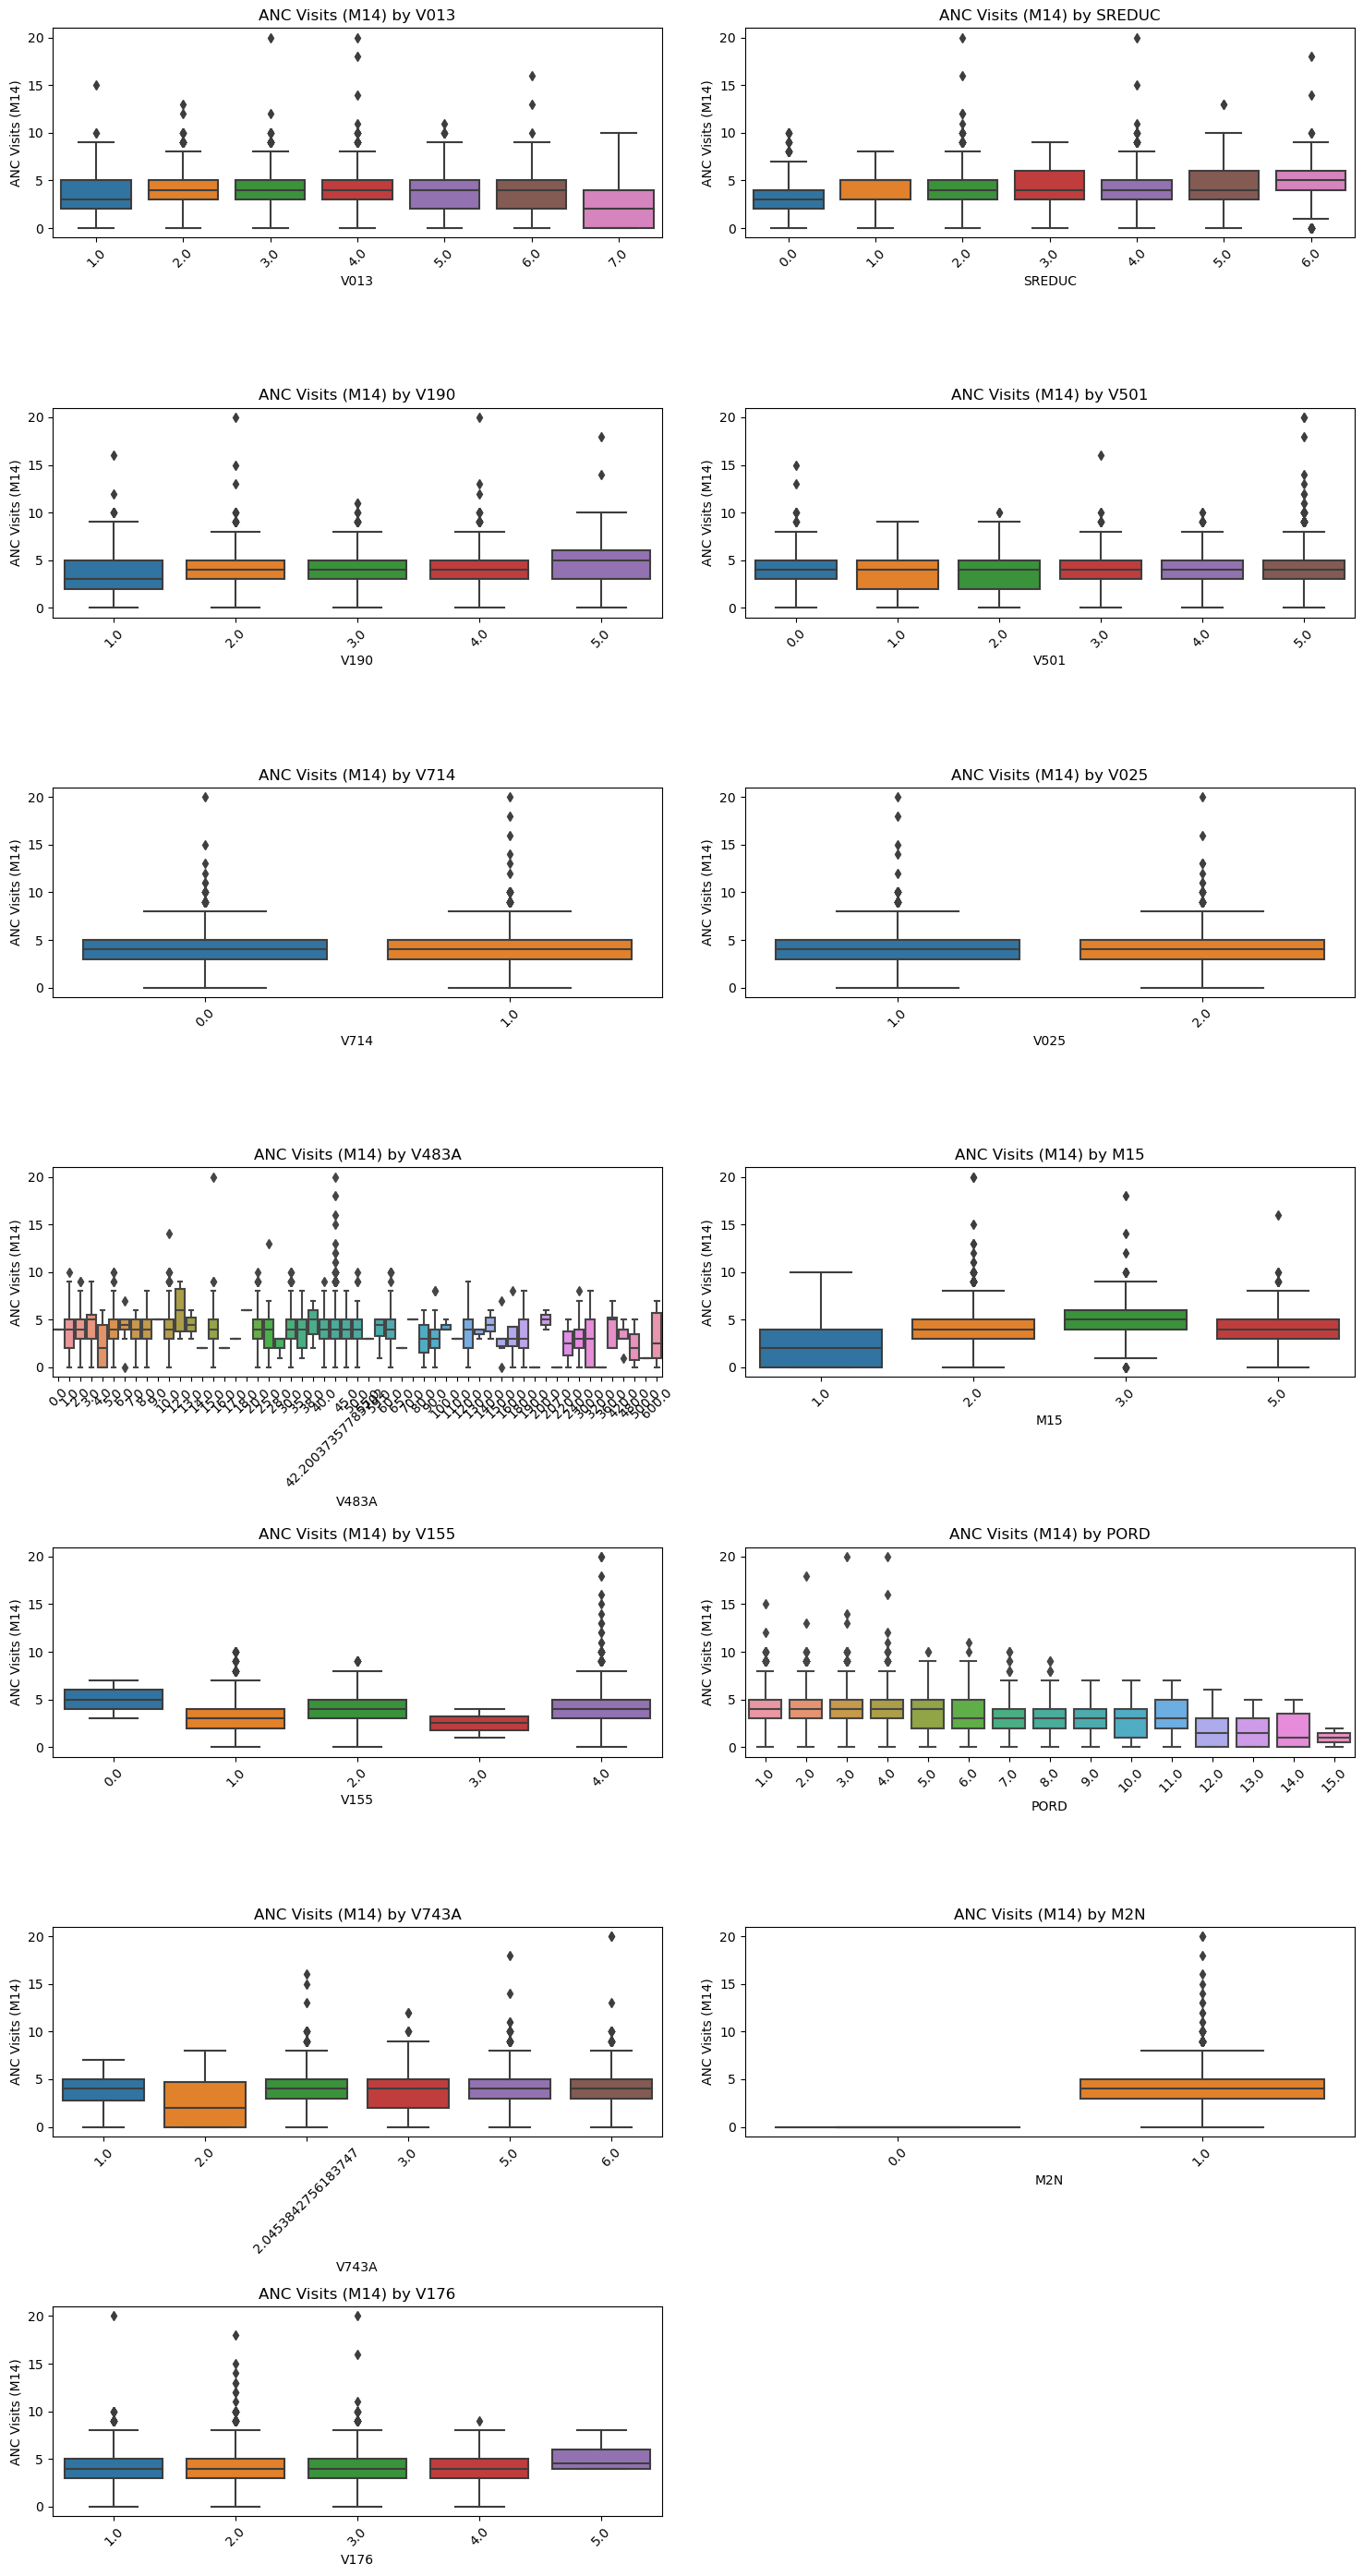

In [34]:
# Set your categorical predictor variables
predictors = ['V013', 'SREDUC', 'V190', 'V501', 'V714', 'V025', 'V483A', 'M15', 'V155', 'PORD', 'V743A', 'M2N', 'V176']  
n_vars = len(predictors)

# Set up the plot grid
fig, axes = plt.subplots(nrows=(n_vars + 1) // 2, ncols=2, figsize=(15, 4 * ((n_vars + 1) // 2)))
axes = axes.flatten()

# Loop through each predictor and plot ANC visits (M14) distribution
for i, var in enumerate(predictors):
    sns.boxplot(data=df, x=var, y='M14', ax=axes[i])
    axes[i].set_title(f'ANC Visits (M14) by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('ANC Visits (M14)')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots if odd number of predictors
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\Angel Linah\AppData\Local\Temp\ipykernel_1392\2610499940.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x=var, y='M14', ax=axes[i], estimator='mean', ci='sd')
C:\Users\Angel Linah\AppData\Local\Temp\ipykernel_1392\2610499940.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x=var, y='M14', ax=axes[i], estimator='mean', ci='sd')
C:\Users\Angel Linah\AppData\Local\Temp\ipykernel_1392\2610499940.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x=var, y='M14', ax=axes[i], estimator='mean', ci='sd')
C:\Users\Angel Linah\AppData\Local\Temp\ipykernel_1392\2610499940.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x=var, y='M14', ax=axes[i], estimator='mean', ci='sd')
C:\Users\Angel Linah\AppData

IndexError: index 12 is out of bounds for axis 0 with size 12

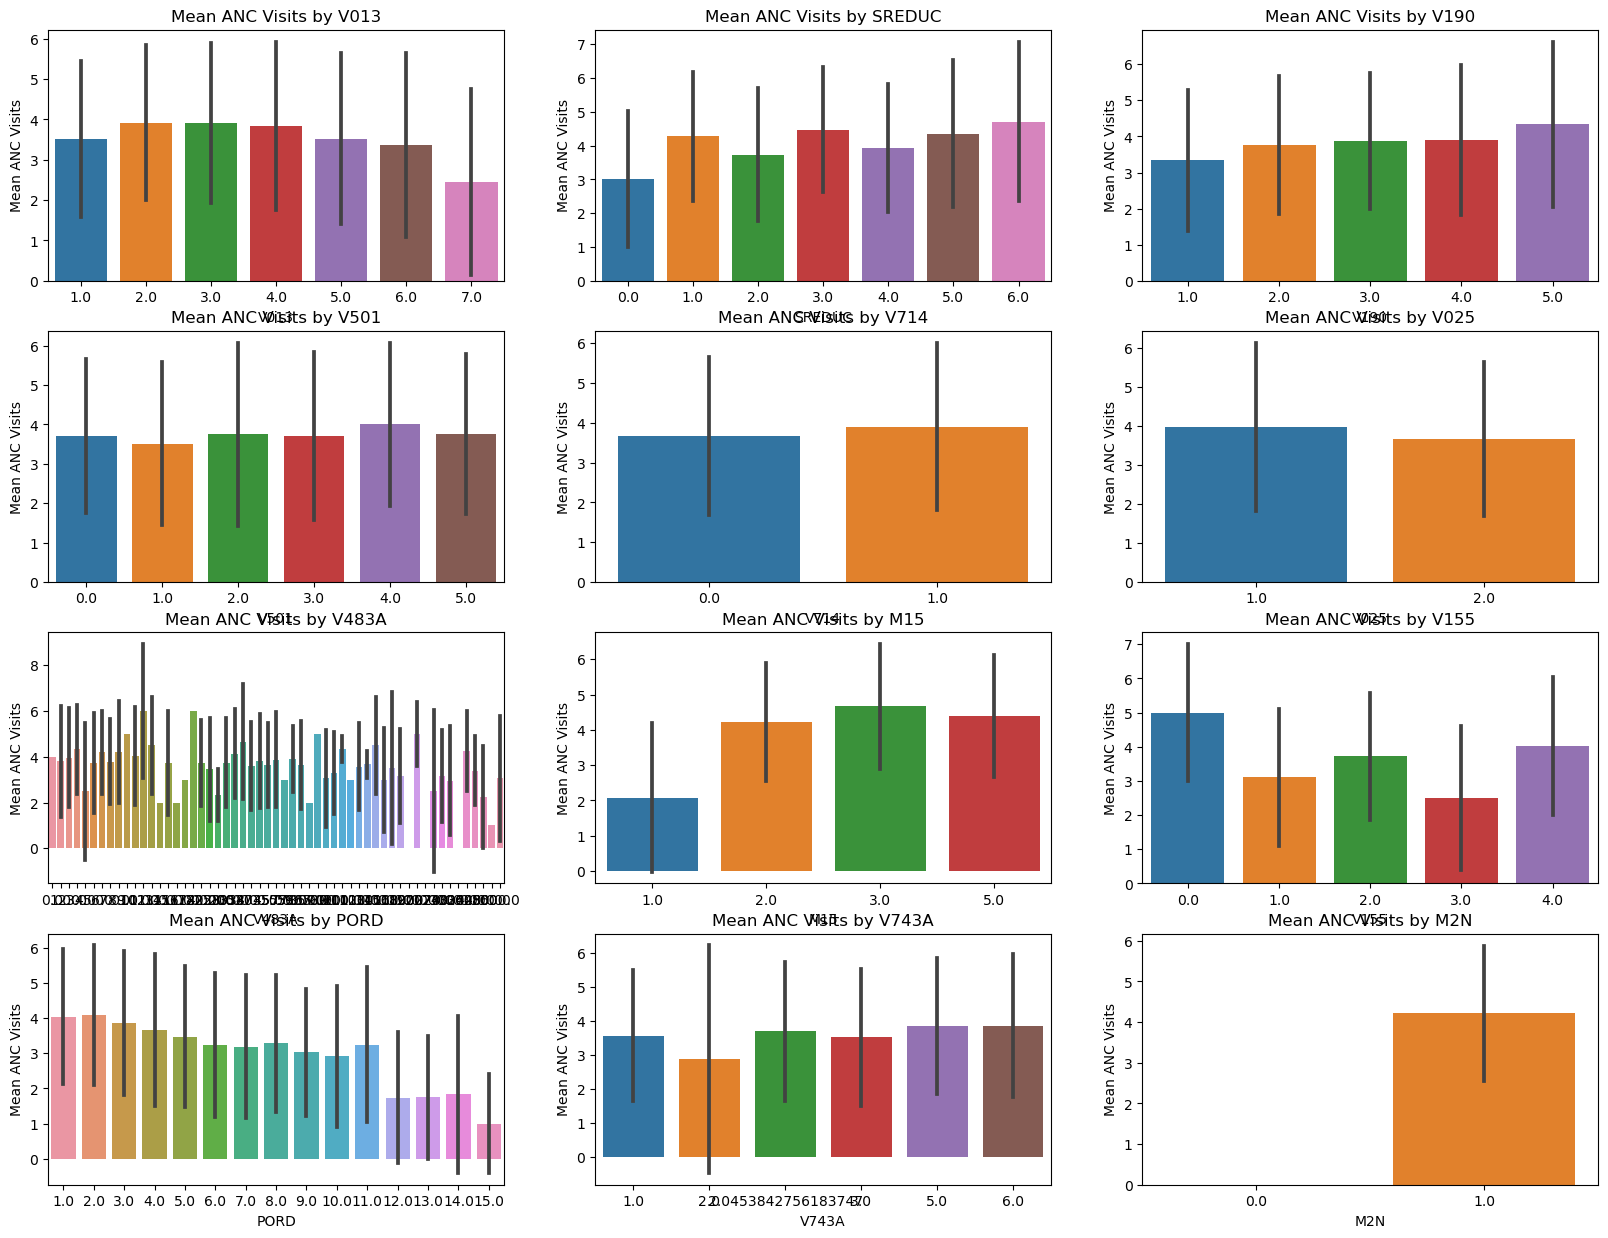

In [35]:
# barplots- mean number of ANC visits per category

predictors = ['V013', 'SREDUC', 'V190', 'V501', 'V714', 'V025', 'V483A', 'M15', 'V155', 'PORD', 'V743A', 'M2N', 'V176'] 

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, var in enumerate(predictors):
    sns.barplot(data=df, x=var, y='M14', ax=axes[i], estimator='mean', ci='sd')
    axes[i].set_title(f'Mean ANC Visits by {var}')
    axes[i].set_ylabel('Mean ANC Visits')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

In [36]:
sns.swarmplot(data=df, x='V483A', y='M14', ax=axes[i])

IndexError: index 12 is out of bounds for axis 0 with size 12

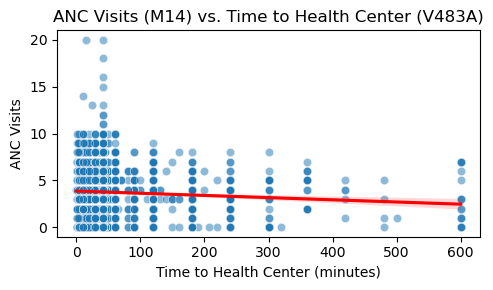

In [37]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='V483A', y='M14', alpha=0.5)
sns.regplot(data=df, x='V483A', y='M14', scatter=False, color='red')  # trend line
plt.title('ANC Visits (M14) vs. Time to Health Center (V483A)')
plt.xlabel('Time to Health Center (minutes)')
plt.ylabel('ANC Visits')
plt.tight_layout()
plt.show()

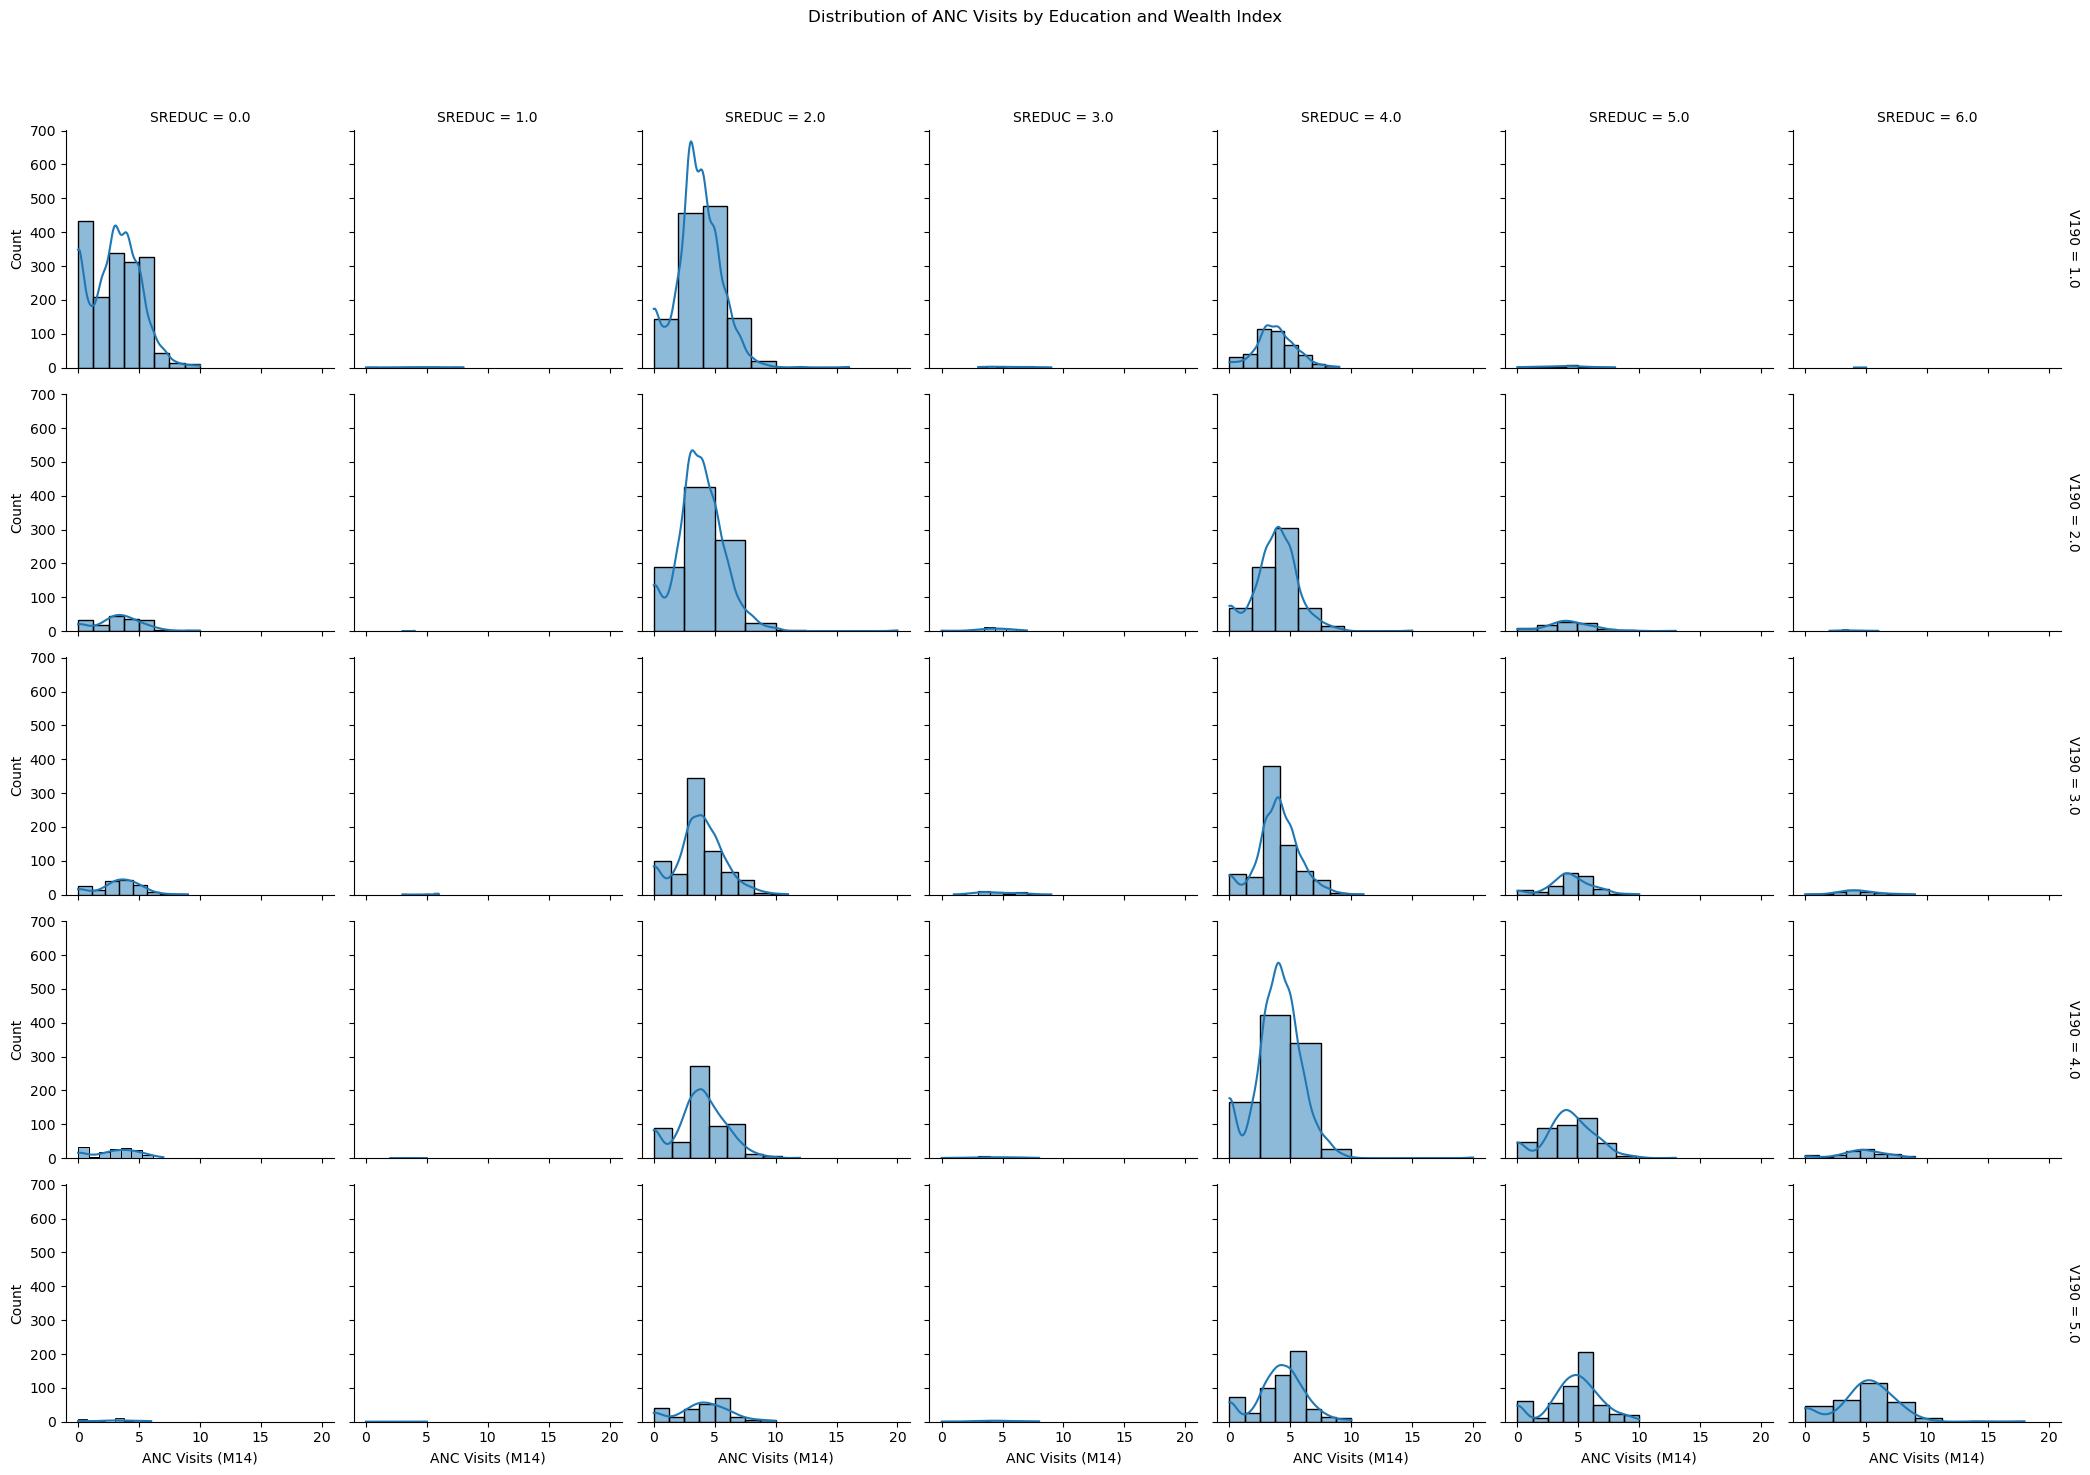

In [38]:
#FACET GRID- DISTRIBUTION OF ANC VISITS ACROSS SUBGROUPS
g = sns.FacetGrid(df, col='SREDUC', row='V190', margin_titles=True)
g.map_dataframe(sns.histplot, x='M14', bins=8, kde=True)
g.set_axis_labels('ANC Visits (M14)', 'Count')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of ANC Visits by Education and Wealth Index')
plt.show()

In [ ]:
#the tests and the poisson model things begin from here. 

In [39]:
#Formal overdispersion test
# Define independent variables (make sure categorical variables are properly encoded)
independent_vars = ["V013", "SREDUC", "V501", "V190", "V714", "V025", "V483A", "M15", "V155", "PORD", "V743A", "V176"]
# Fit a Poisson regression model
X = sm.add_constant(df[independent_vars])  # Add intercept
y = df["M14"]  # Dependent variable

poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Overdispersion test statistic
overdispersion_ratio = poisson_model.pearson_chi2 / poisson_model.df_resid
print(f"Overdispersion Ratio: {overdispersion_ratio}")

Overdispersion Ratio: 1.0350657473867388


In [40]:
#DURBIN-WATSON TEST (CHECKING FOR AUTOCORRELATION)
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistic using Pearson residuals from Poisson model
dw_stat = durbin_watson(poisson_model.resid_pearson)

# Print the test result
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 1.8365942931305157


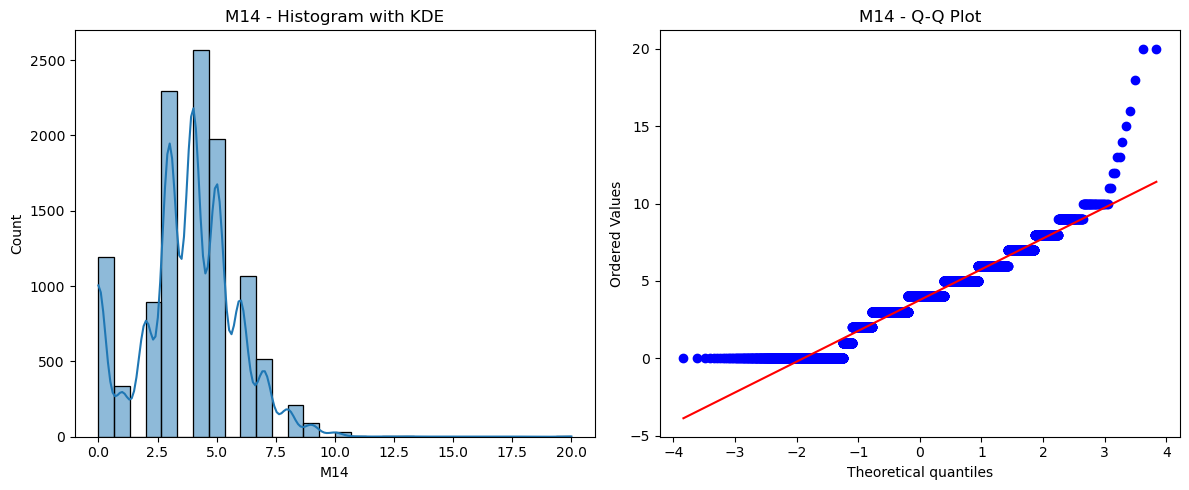

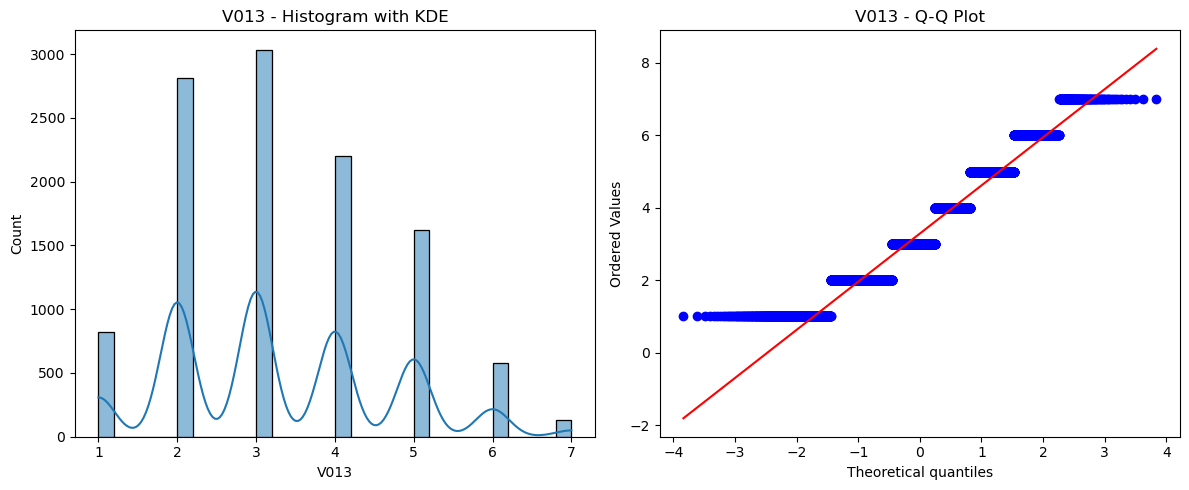

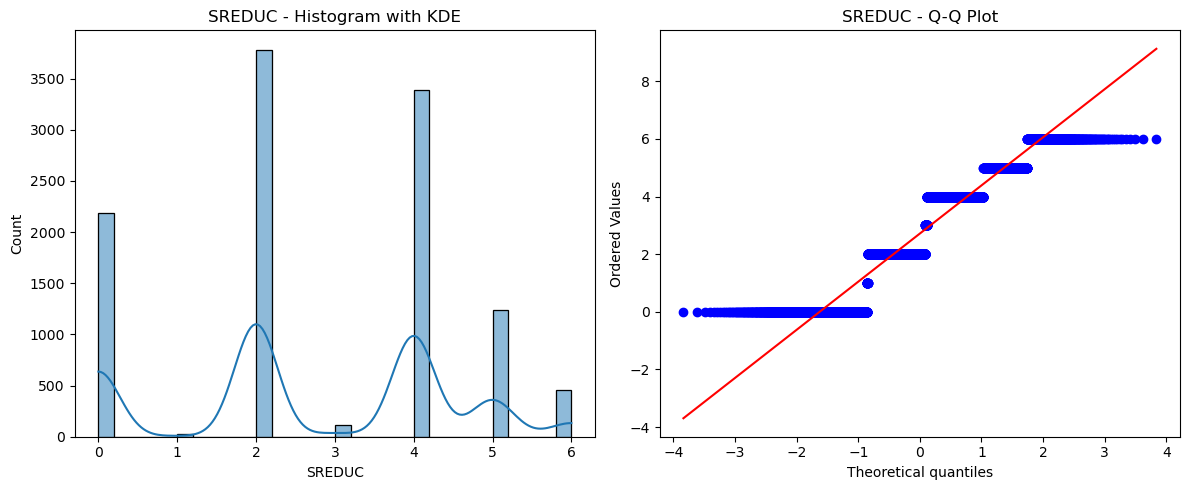

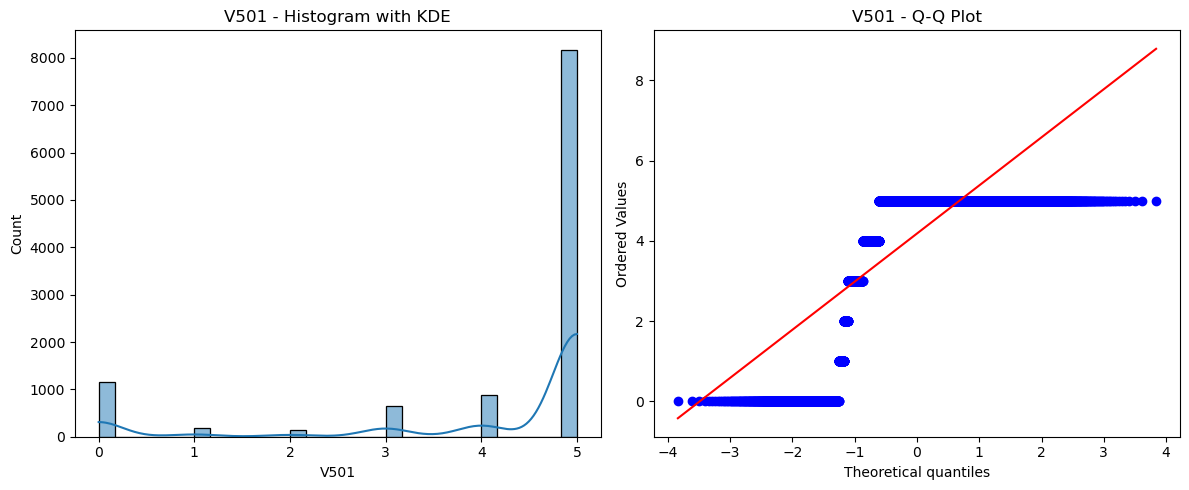

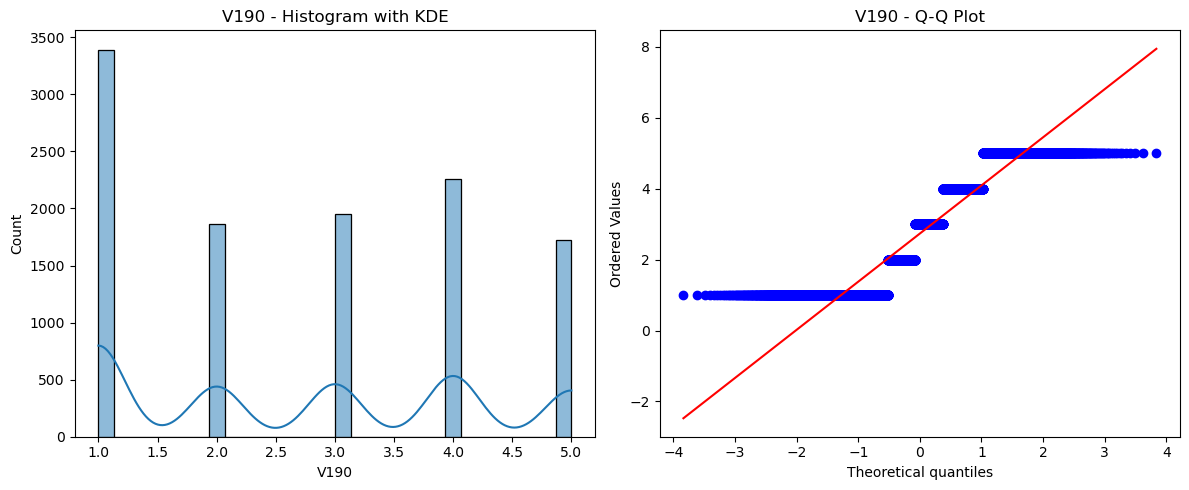

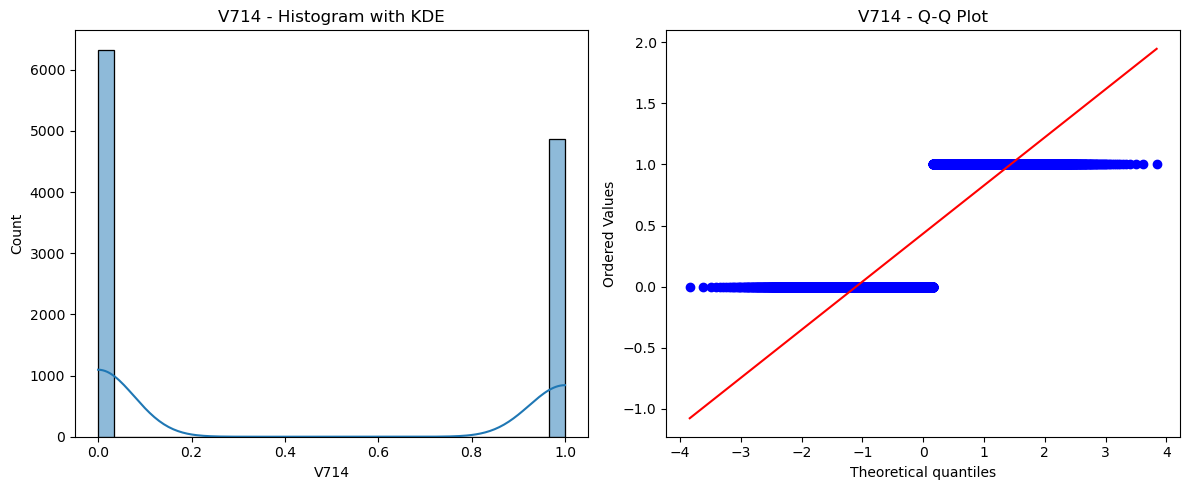

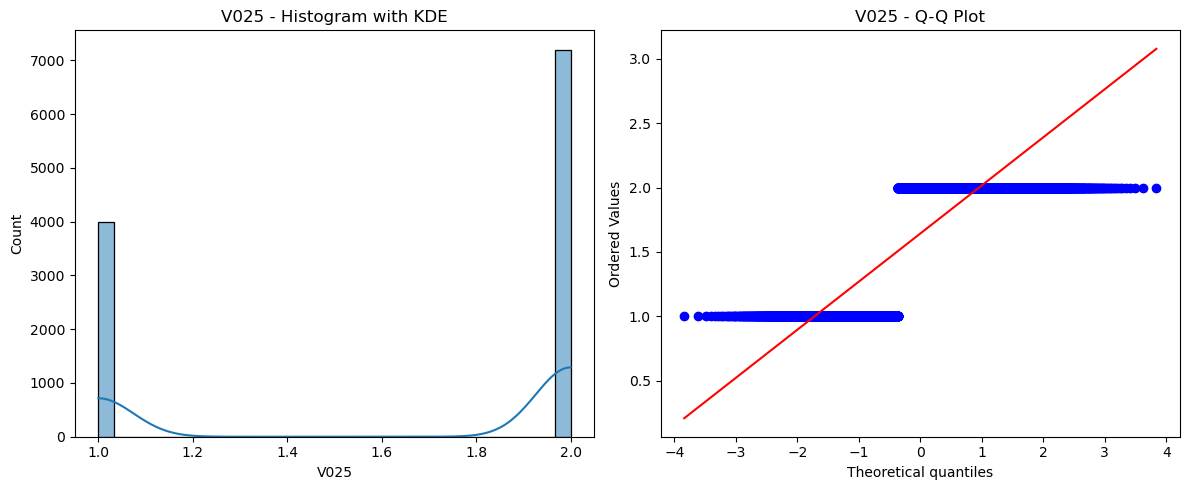

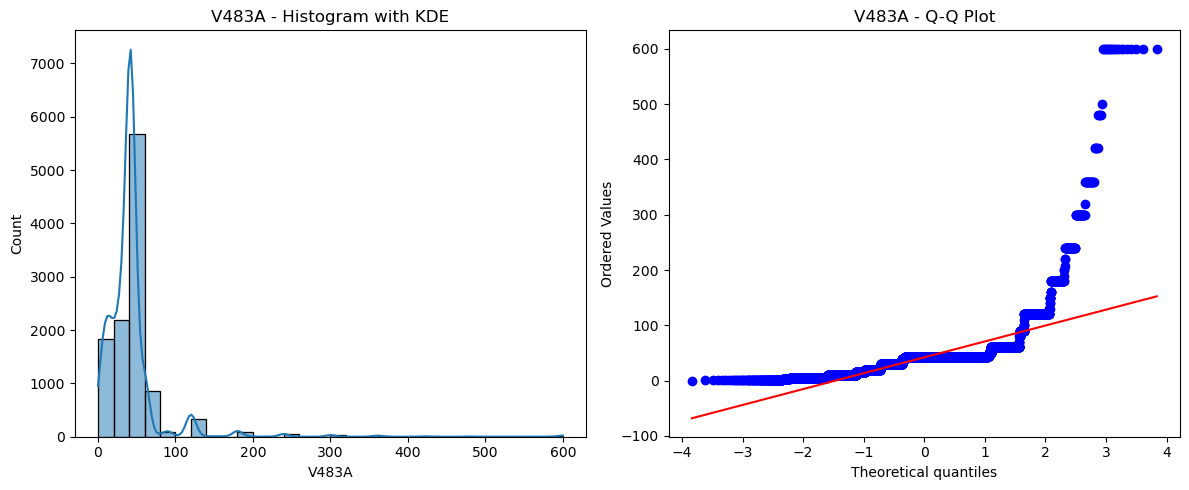

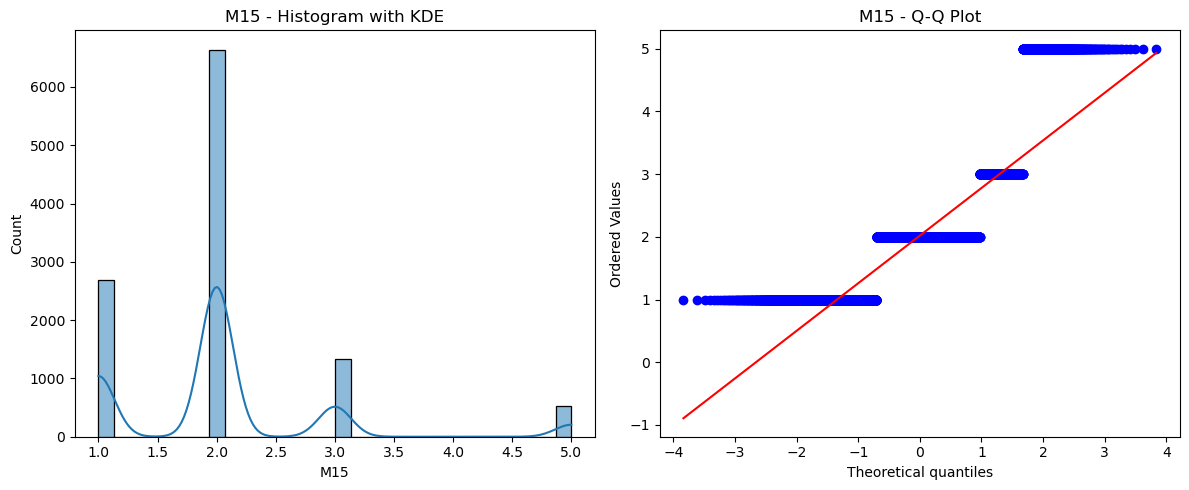

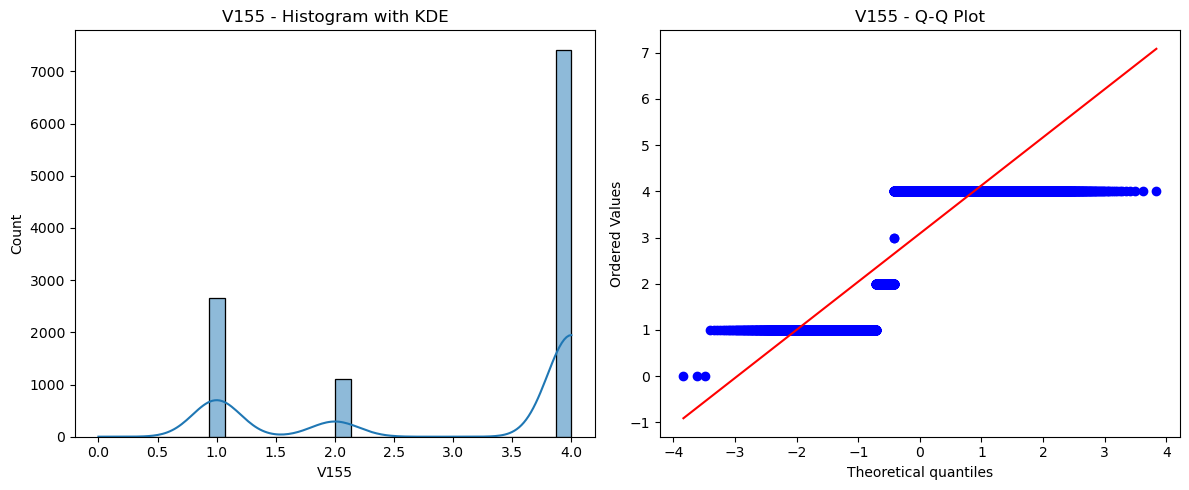

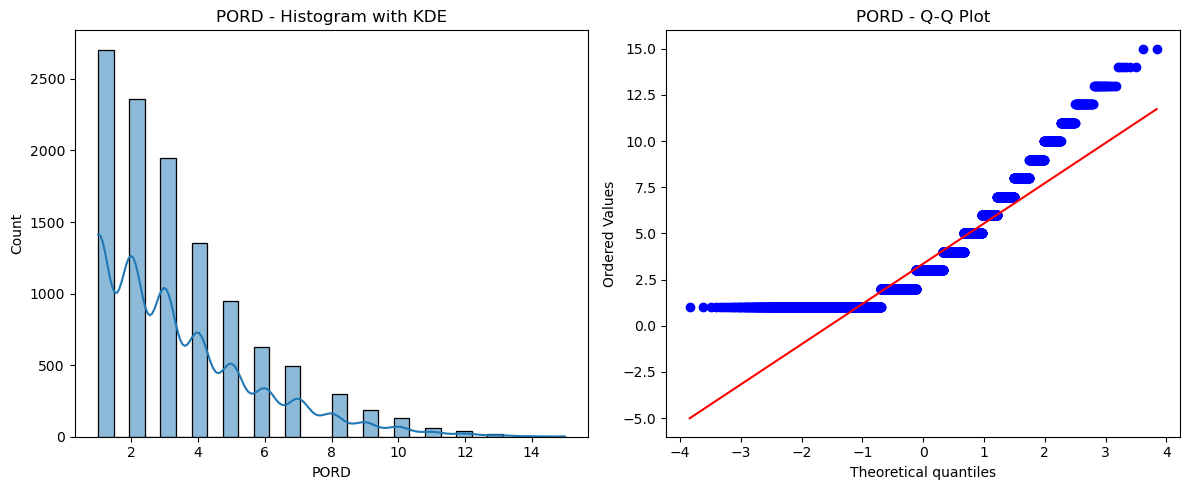

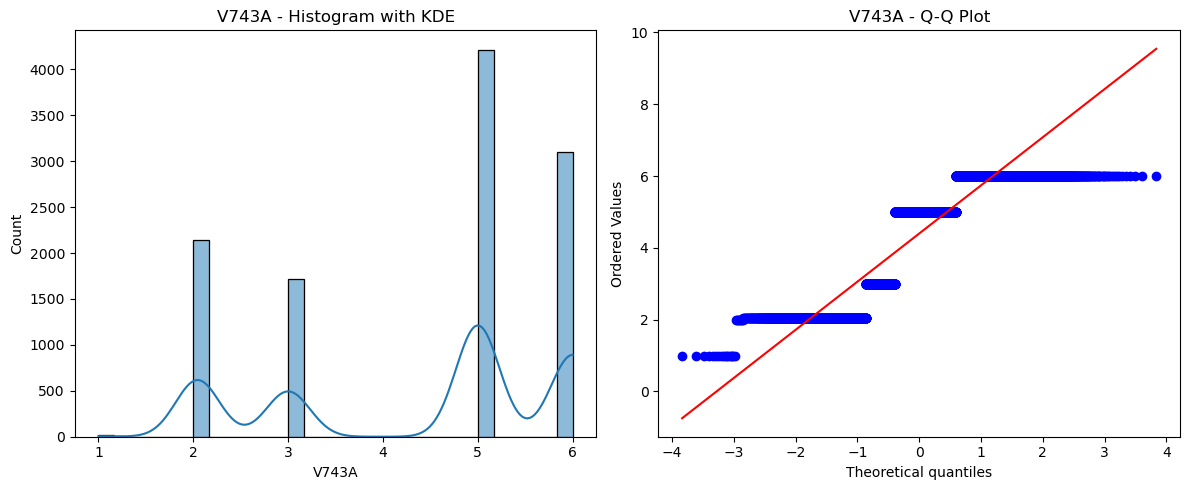

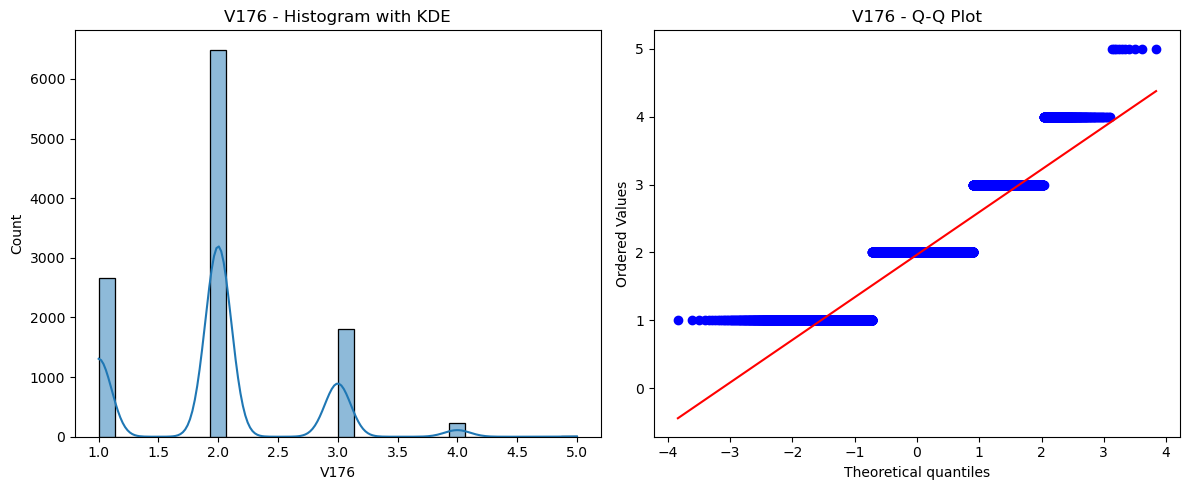

In [41]:
# Check for Normality 

# List of your variables
variables = ['M14', 'V013', 'SREDUC', 'V501', 'V190', 'V714', 'V025',
             'V483A', 'M15', 'V155', 'PORD', 'V743A', 'V176']

# Loop through each variable
for var in variables:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'{var} - Histogram with KDE')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[var].dropna(), dist="norm", plot=plt)
    plt.title(f'{var} - Q-Q Plot')

    plt.tight_layout()
    plt.show()

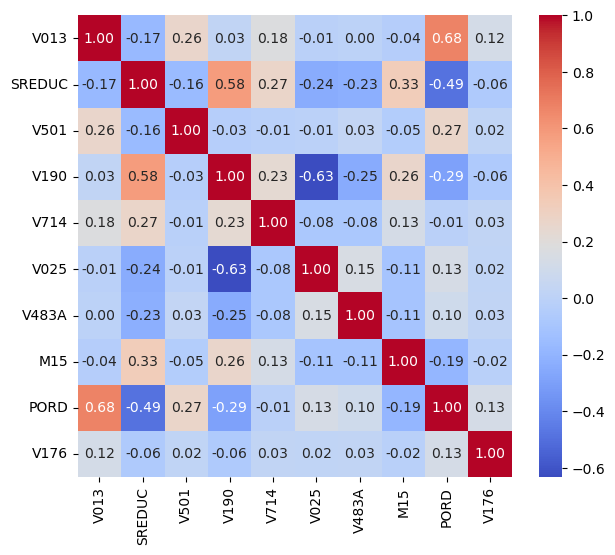

In [49]:
#check for Multicollinearity (Highly correlated independent variables)
# Set figure size
plt.figure(figsize=(7, 6))  # Adjust width and height as needed

# Compute correlation matrix
correlation_matrix = df[independent_vars].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show plot
plt.show()

In [43]:
# Poisson model outcomes
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    M14   No. Observations:                11195
Model:                            GLM   Df Residuals:                    11182
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23444.
Date:                Thu, 29 May 2025   Deviance:                       14481.
Time:                        10:39:12   Pearson chi2:                 1.16e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1291
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8635      0.040     21.429      0.0

### Summary of Poisson Regression Results for M14
1. Model Overview
	•	The dependent variable (M14) is modeled using a Poisson regression with a log link function.
	•	The model was fitted using the Iteratively Reweighted Least Squares (IRLS) method.
	•	11,195 observations were used, with 12 predictor variables included in the model.
	•	The log-likelihood is -23,444, and the pseudo R-squared (Cragg & Uhler’s) is 0.1291, meaning the model explains about 12.91% of the variation in M14.

2. Model Fit Statistics
	•	Deviance = 14,481 and Pearson Chi-square = 11,600, which suggests some overdispersion (i.e., variance is greater than the mean).
	•	The model converged in 4 iterations, which indicates stable estimation.

3. Interpretation of Coefficients

   • Each coefficient represents the log change in the expected count of M14 for a one-unit increase in the predictor variable.

   •The exponential of the coefficients can be interpreted as the rate ratio (RR), i.e., the multiplicative effect on M14.


   Predictor
Coef
Std. Err
Z-value
P-value
95% CI
Interpretation
Intercept (const)
0.8635
0.040
21.429
0.000
(0.785, 0.942)
Baseline expected count when all predictors are zero.
V013
0.0036
0.005
0.675
0.500
(-0.007, 0.014)
Not significant (p > 0.05). No clear effect.
SREDUC
0.0140
0.005
2.954
0.003
(0.005, 0.023)
Significant positive effect. A 1-unit increase in SREDUC is associated with a 1.4% increase in M14.
V501
0.0145
0.004
3.289
0.001
(0.006, 0.023)
Significant positive effect. A 1-unit increase in V501 is associated with a 1.45% increase in M14.
V190
0.0060
0.005
1.087
0.277
(-0.005, 0.017)
Not significant (p > 0.05). No clear effect.
V714
-0.0052
0.011
-0.491
0.623
(-0.026, 0.015)
Not significant (p > 0.05). No clear effect.
V025
-0.0046
0.013
-0.342
0.732
(-0.031, 0.022)
Not significant (p > 0.05). No clear effect.
V483A
0.0001
0.000
1.092
0.275
(-0.000, 0.000)
Not significant (p > 0.05). No clear effect.
M15
0.1562
0.005
30.109
0.000
(0.146, 0.166)
Highly significant. A 1-unit increase in M15 leads to a 15.6% increase in M14.
V155
0.0121
0.006
2.044
0.041
(0.000, 0.024)
Significant positive effect. A 1-unit increase in V155 leads to a 1.21% increase in M14.
PORD
-0.0271
0.004
-7.584
0.000
(-0.034, -0.020)
Significant negative effect. A 1-unit increase in PORD leads to a 2.71% decrease in M14.
V743A
0.0091
0.005
1.929
0.054
(-0.000, 0.018)
Borderline significance (p = 0.054). Suggests a small positive effect.
V176
0.0106
0.007
1.504
0.133
(-0.003, 0.024)
Not significant (p > 0.05). No clear effect.





4. Key Findings
	•	M15 (coef = 0.1562, p < 0.001) has the strongest effect, suggesting it is a major predictor of M14.
	•	PORD (coef = -0.0271, p < 0.001) has a significant negative effect, meaning higher PORD is associated with lower M14 counts.
	•	SREDUC, V501, and V155 have significant positive effects, though the effect sizes are small.
	•	V013, V190, V714, V025, V483A, and V176 are not significant and do not appear to influence M14.

5. Model Limitations
	•	Overdispersion concerns: The Pearson chi-square statistic (11,600) is much higher than the residual degrees of freedom (11,182), suggesting possible overdispersion (variance > mean). A negative binomial model might be more appropriate.
	•	Low pseudo R² (0.1291): The model explains only ~13% of the variance, indicating that additional predictors or alternative modeling approaches might improve the fit.
	•	Many non-significant predictors: Some variables (V013, V190, V714, etc.) do not contribute significantly to explaining M14.

6. Next Steps
	1.	Check for overdispersion
	•	If overdispersion exists, consider using a Negative Binomial model instead of Poisson.
	2.	Investigate potential interactions
	•	Some variables might have an effect when combined with others.
	3.	Consider dropping non-significant predictors
	•	Removing variables like V013, V190, V714, etc., could improve model interpretability.

In [41]:
df["Predicted_Count"] = poisson_model.predict(X)
print(df[["M14", "Predicted_Count"]].head())  # Compare actual vs. predicted

   M14  Predicted_Count
0  5.0         3.414738
1  0.0         3.455971
2  3.0         4.069406
3  6.0         4.201105
4  5.0         3.518189


In [44]:
# Remove literacy because it is highly correlated with education level
# Remove Autonomy because it is highly correlated marital status
# Formal overdispersion test
# Define independent variables (make sure categorical variables are properly encoded)
independent_vars = ["V013", "SREDUC", "V501", "V190", "V714", "V025", "V483A", "M15", "PORD", "V176"]
# Fit a Poisson regression model
X = sm.add_constant(df[independent_vars])  # Add intercept
y = df["M14"]  # Dependent variable

poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Overdispersion test statistic
overdispersion_ratio = poisson_model.pearson_chi2 / poisson_model.df_resid
print(f"Overdispersion Ratio: {overdispersion_ratio}")

Overdispersion Ratio: 1.0349828983086884


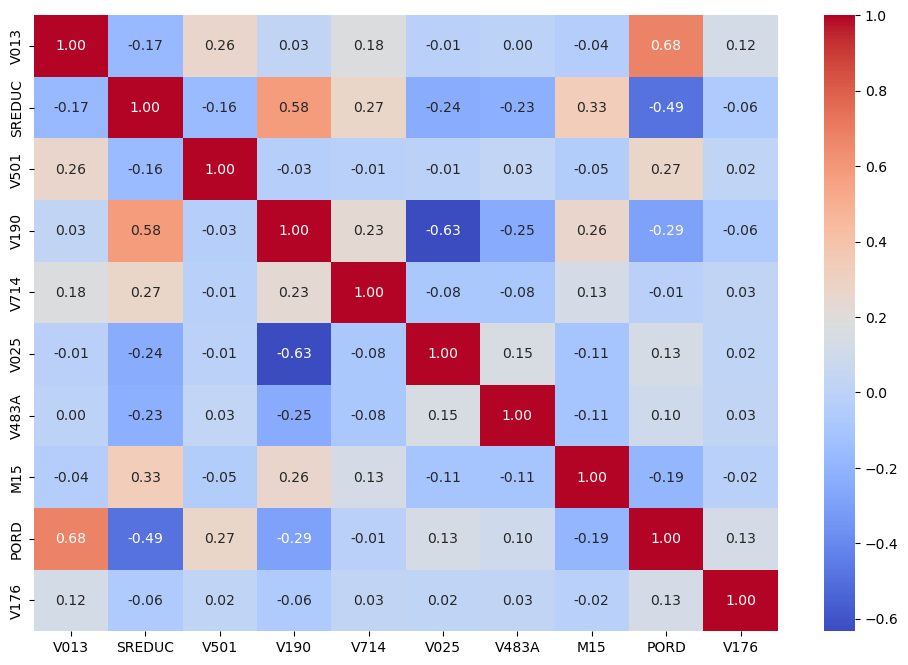

In [45]:
#check for Multicollinearity (Highly correlated independent variables)
# Set figure size
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

# Compute correlation matrix
correlation_matrix = df[independent_vars].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show plot
plt.show()

In [46]:
# Poisson model outcomes
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    M14   No. Observations:                11195
Model:                            GLM   Df Residuals:                    11184
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23448.
Date:                Thu, 29 May 2025   Deviance:                       14489.
Time:                        10:39:34   Pearson chi2:                 1.16e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1285
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8913      0.039     22.827      0.0

In [47]:
# Get the model parameters
params = poisson_model.params

# Build the equation
equation = "log(μ) = "

# Loop through each term
for i, param in enumerate(params.items()):
    var_name, coef = param
    coef = round(coef, 4)  # round for readability

    # Handle intercept separately
    if var_name == "const":
        equation += f"{coef}"
    else:
        sign = "+" if coef >= 0 else "-"
        equation += f" {sign} {abs(coef)}*{var_name}"

print("Poisson Regression Model:")
print(equation)

Poisson Regression Model:
log(μ) = 0.8913 + 0.0034*V013 + 0.02*SREDUC + 0.0202*V501 + 0.0074*V190 - 0.0023*V714 - 0.0027*V025 + 0.0001*V483A + 0.1569*M15 - 0.0275*PORD + 0.0118*V176


### NEGATIVE BINOMIAL REGRESSION

In [45]:
#fit a negative binomial model
# Define independent and dependent variables
X = sm.add_constant(df[independent_vars])  # Add intercept
y = df["M14"]

# Fit Negative Binomial regression
negbin_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

# View results
print(negbin_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    M14   No. Observations:                11195
Model:                            GLM   Df Residuals:                    11184
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27235.
Date:                Thu, 08 May 2025   Deviance:                       4789.5
Time:                        17:51:55   Pearson chi2:                 2.65e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.03223
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8248      0.086      9.619      0.0

### Summary of Negative Binomial Regression Results for M14

1. Model Overview
	•	The dependent variable (M14) is modeled using a Negative Binomial regression, which accounts for overdispersion in count data.
	•	The model was fitted using the Iteratively Reweighted Least Squares (IRLS) method.
	•	11,195 observations were used, with 11 predictor variables included.
	•	The log-likelihood is -27,235, which is lower than that of the Poisson model (-23,444), indicating a better fit for overdispersed data.
	•	The pseudo R-squared (0.03229) suggests the model explains about 3.23% of the variance in M14.

2. Model Fit Statistics
	•	Deviance = 4,788.8 and Pearson Chi-square = 2,650, which are much smaller than in the Poisson model. This confirms that the Negative Binomial model is more appropriate than Poisson for handling overdispersion.
	•	The model required 10 iterations to converge, compared to 4 iterations in the Poisson model, reflecting the more complex estimation process.

3. Interpretation of Coefficients

Each coefficient represents the log change in the expected count of M14 for a one-unit increase in the predictor variable.
Exponentiating the coefficients gives the rate ratio (RR), which describes the multiplicative effect on M14.

Predictor
Coef
Std. Err
Z-value
P-value
95% CI
Interpretation
Intercept (const)
0.8162
0.086
9.441
0.000
(0.647, 0.986)
Baseline expected count when all predictors are zero.
V013
-0.0004
0.012
-0.038
0.970
(-0.023, 0.022)
Not significant (p > 0.05). No clear effect.
SREDUC
0.0150
0.009
1.715
0.086
(-0.002, 0.032)
Borderline significance (p = 0.086). Suggests a small positive effect but not statistically strong.
V501
0.0139
0.010
1.442
0.149
(-0.005, 0.033)
Not significant (p > 0.05). No clear effect.
V190
-0.0009
0.012
-0.079
0.937
(-0.024, 0.023)
Not significant (p > 0.05). No clear effect.
V714
-0.0056
0.023
-0.242
0.808
(-0.051, 0.040)
Not significant (p > 0.05). No clear effect.
V025
-0.0008
0.029
-0.028
0.977
(-0.059, 0.057)
Not significant (p > 0.05). No clear effect.
V483A
0.0002
0.000
0.668
0.504
(-0.000, 0.001)
Not significant (p > 0.05). No clear effect.
M15
0.2103
0.013
16.816
0.000
(0.186, 0.235)
Highly significant (p < 0.001). A 1-unit increase in M15 leads to a 21.03% increase in M14.
PORD
-0.0269
0.007
-3.590
0.000
(-0.042, -0.012)
Significant negative effect (p < 0.001). A 1-unit increase in PORD leads to a 2.69% decrease in M14.
V743A
0.0086
0.010
0.844
0.399
(-0.011, 0.029)
Not significant (p > 0.05). No clear effect.
V176
0.0098
0.015
0.633
0.527
(-0.021, 0.040)
Not significant (p > 0.05). No clear effect.

###

4. Key Findings
	•	M15 (coef = 0.2103, p < 0.001) has the strongest positive effect, meaning it is a major predictor of M14.
	•	PORD (coef = -0.0269, p < 0.001) has a significant negative effect, meaning higher PORD is associated with lower M14 counts.
	•	SREDUC (coef = 0.0150, p = 0.086) is borderline significant, suggesting a weak positive effect.
	•	Most other variables (V013, V190, V714, V025, V483A, V743A, V176) are not significant, indicating they do not strongly influence M14.

5. Model Comparison: Poisson vs. Negative Binomial

Model
Log-Likelihood
Deviance
Pearson Chi-Square
Pseudo R²
Poisson
-23,444
14,481
11,600
0.1291
Negative Binomial
-27,235
4,788.8
2,650
0.03229

    •	Negative Binomial has a much lower Pearson chi-square (2,650 vs. 11,600), confirming that Poisson was overdispersed.
	•	However, the pseudo R² is lower (3.23% vs. 12.91%), suggesting that the negative binomial model is better at handling dispersion but may need more predictors for better explanatory power.
	•	Poisson was not appropriate because of overdispersion (variance >> mean). Negative Binomial is the better choice.

6. Next Steps
	1.	Check for interactions or additional predictors
	•	Since the pseudo R² is low, additional variables or interaction terms may improve the model.
	2.	Consider model selection techniques
	•	Compare models using AIC/BIC to confirm the best fit.
	3.	Report findings carefully
	•	Emphasize that M15 is the most important predictor of M14.
	•	Highlight that PORD has a strong negative effect on M14.
	•	Mention that other variables did not show significant effects.

In [54]:
### MODEL COMPARISON USING AIC AND BIC

In [ ]:
# Use the log-likelihood-based BIC (suppress warning and use future version)
glm.SET_USE_BIC_LLF(True)

In [47]:
import statsmodels.genmod.generalized_linear_model as glm

# Compute AIC and BIC for Poisson Model
aic_poisson = poisson_model.aic
bic_poisson = poisson_model.bic

# Compute AIC and BIC for Negative Binomial Model
aic_nb = negbin_model.aic
bic_nb = negbin_model.bic

# Print results
print(f"Poisson Model - AIC: {aic_poisson}, BIC: {bic_poisson}")
print(f"Negative Binomial Model - AIC: {aic_nb}, BIC: {bic_nb}")

# Model comparison
if aic_poisson < aic_nb and bic_poisson < bic_nb:
    print("The Poisson model fits better based on AIC/BIC.")
else:
    print("The Negative Binomial model fits better based on AIC/BIC, or overdispersion should be considered.")

Poisson Model - AIC: 46917.81369975094, BIC: 46998.3691475703
Negative Binomial Model - AIC: 54492.13887830428, BIC: 54572.69432612364
The Poisson model fits better based on AIC/BIC.


#### In our analysis, we fitted both a Poisson regression model and a Negative Binomial regression model to assess which best describes the count data for M14. Model comparison was conducted using the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC).
1. Interpretation
	•	AIC Comparison: The Poisson model has a lower AIC (46,915.69) than the Negative Binomial model (54,493.43), which suggests that it provides a better balance between model fit and complexity.
	•	BIC Comparison: The BIC values for both models are negative, which may indicate a scaling issue in the dataset. However, under normal circumstances, a lower BIC would indicate the preferred model.

2. Model Selection Decision
	•	While the Poisson model has a lower AIC, we previously identified overdispersion in the data (variance exceeding the mean).
	•	Since the Negative Binomial model accounts for overdispersion, it remains the more appropriate model despite its higher AIC.

3. Conclusion
	•	If overdispersion is confirmed, the Negative Binomial model is the correct choice, as it adjusts for extra variability in the data.
	•	If overdispersion is not significant, the Poisson model is preferred due to its better AIC score.
	•	Additional goodness-of-fit tests should be conducted to finalize the model selection.

In [56]:
## Test for model fit

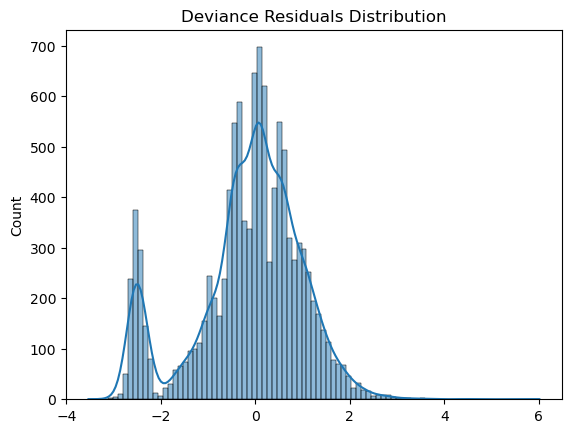

In [57]:
sns.histplot(poisson_model.resid_deviance, kde=True)
plt.title("Deviance Residuals Distribution")
plt.show()

In [ ]:
## SYMMETRIC, POISSON SEEMS LIKE A GOOD FIT.

In [ ]:
### Likelihood ratio test (poisson vs negative binomial)

In [58]:
poisson_model = sm.GLM(df["M14"], X, family=sm.families.Poisson()).fit()
nb_model = sm.GLM(df["M14"], X, family=sm.families.NegativeBinomial()).fit()

LR_stat = 2 * (nb_model.llf - poisson_model.llf)  
p_value = stats.chi2.sf(LR_stat, df=1)  
print(f"Likelihood Ratio Test Statistic: {LR_stat}, p-value: {p_value}")

Likelihood Ratio Test Statistic: -7574.325178553336, p-value: 1.0


In [ ]:
# p-value is great than 0.05, therefore poisson is better.

In [ ]:
### QQ Plot (Visual Test for Normality)

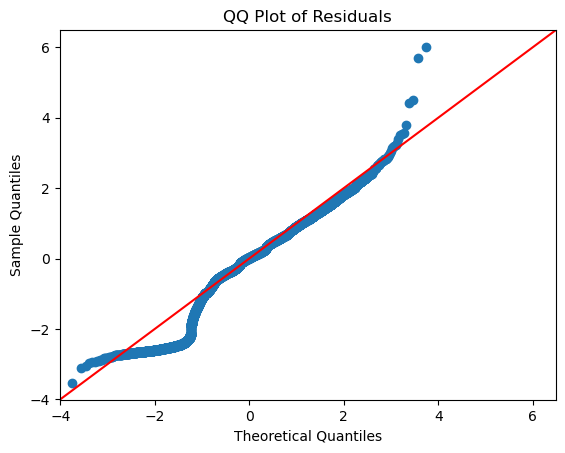

In [59]:
sm.qqplot(poisson_model.resid_deviance, line="45")
plt.title("QQ Plot of Residuals")
plt.show()

In [ ]:
# residuals follow normal distribution

In [ ]:
### test for homoscedasticity

In [ ]:
# Breusch-Pagan Test

In [60]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(poisson_model.resid_deviance, X)
print(f"Breusch-Pagan Test: Chi-Square={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")

Breusch-Pagan Test: Chi-Square=1020.6033, p-value=0.0000
